In the Social media networks, the advertising agencies often use the Influencers for the product marketing, but two of the major questions here are whether they found the right set of users? and Is the set of the users are the most cost effective? In this research we are trying to address these two questions. This research is going through three steps,
<ul>
  <li>Applying Constraints to the network</li>
  <li>Categorizing the nodes as influencers and followers</li>
  <li>Getting the lesat of number of Influencers who can reach maximum followers</li>

In [0]:
pip install networkx

Python interpreter will be restarted.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-e586c36f-7bad-4fc0-8309-d80cbb0c0d18/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.


In [0]:
#Importing Needed packages.

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random
import pyspark
from pyspark.sql import SparkSession
from pyspark.context import SparkContext
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql import DataFrame
from collections import OrderedDict

In [0]:
spark = SparkSession \
    .builder \
    .appName("Project") \
    .getOrCreate()

0.Initializing the Network(In the original implementation, network will be loaded from database)

In [0]:
#For the implementation, here Karate club network is used
G = nx.karate_club_graph()

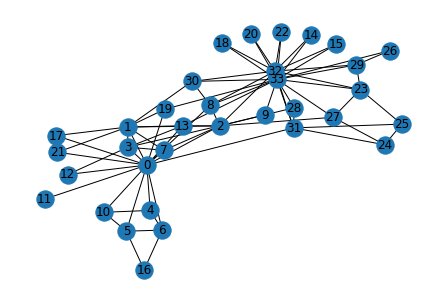

In [0]:
nx.draw(G,with_labels = True,)

In [0]:
len(G)

Out[27]: 34

In [0]:
degreedic ={}
for node in G:
  degreedic[node]=G.degree[node]
degreedic

Out[28]: {0: 16,
 1: 9,
 2: 10,
 3: 6,
 4: 3,
 5: 4,
 6: 4,
 7: 4,
 8: 5,
 9: 2,
 10: 3,
 11: 1,
 12: 2,
 13: 5,
 14: 2,
 15: 2,
 16: 2,
 17: 2,
 18: 2,
 19: 3,
 20: 2,
 21: 2,
 22: 2,
 23: 5,
 24: 3,
 25: 3,
 26: 2,
 27: 4,
 28: 3,
 29: 4,
 30: 4,
 31: 6,
 32: 12,
 33: 17}

In [0]:
df = pd.DataFrame(columns = ['User Node', 'Language'])

In [0]:
LanguageList =['English','Malayalam','Tamil']
#print(random.choice(LanguageList))
#df = df.append({'User Node':1,'Language':'English'},ignore_index=True)
for node in G:
  lang = random.choice(LanguageList)
  df = df.append({'User Node':node,'Language':lang},ignore_index=True)

In [0]:
df

,User Node,Language
0,0,Tamil
1,1,Malayalam
2,2,Tamil
3,3,Malayalam
4,4,English
5,5,Malayalam
6,6,Tamil
7,7,English
8,8,Tamil
9,9,Tamil


In [0]:
display(df)

User Node,Language
0,Tamil
1,Malayalam
2,Tamil
3,Malayalam
4,English
5,Malayalam
6,Tamil
7,English
8,Tamil
9,Tamil


In [0]:
#Getting elements only with certails constrainst
newdf =spark.createDataFrame(df) 

1.Applying constraints to the network

In [0]:
newdf = newdf.select('*').where(col('Language')=='Malayalam')
display(newdf)

User Node,Language
1,Malayalam
3,Malayalam
5,Malayalam
11,Malayalam
15,Malayalam
16,Malayalam
17,Malayalam
22,Malayalam
24,Malayalam
25,Malayalam


In [0]:
finaldf = newdf.toPandas()

In [0]:
arr = finaldf["User Node"].to_numpy()
removalList =[]
SecGraph = G
for node in G:
  if node not in arr:
    removalList.append(node)

In [0]:
G.remove_nodes_from(removalList)

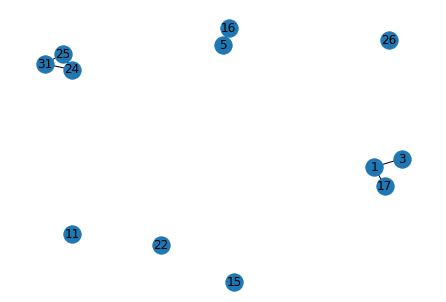

In [0]:
nx.draw(G,with_labels = True,)

In [0]:
newdegdic ={}
for node in G:
  newdegdic[node]=G.degree[node]
newdegdic

Out[40]: {1: 2,
 3: 1,
 5: 1,
 11: 0,
 15: 0,
 16: 1,
 17: 1,
 22: 0,
 24: 2,
 25: 2,
 26: 0,
 31: 2}

2.Categorizing the nodes as Influencers and followers

In [0]:
# Here the mininum number of followers neede are mentioned by the user(Here it is 2)

finalnodelist = list((k) for k,v in newdegdic.items() if v >= 2)

In [0]:
finalnodelist

Out[42]: [1, 24, 25, 31]

3.Getting the list of Influencer combination

In [0]:
import itertools
ComninationList =[]
for L in range(0, len(finalnodelist)+1):
    for subset in itertools.combinations(finalnodelist, L):
        ComninationList.append(subset)
ComninationList

Out[44]: [(),
 (1,),
 (24,),
 (25,),
 (31,),
 (1, 24),
 (1, 25),
 (1, 31),
 (24, 25),
 (24, 31),
 (25, 31),
 (1, 24, 25),
 (1, 24, 31),
 (1, 25, 31),
 (24, 25, 31),
 (1, 24, 25, 31)]

In [0]:
Finaldict ={}
for tuples in ComninationList:
  list1 =[]
  for node in tuples:
    k = G.neighbors(node)
    for node in k:
      if node not in list1:
        list1.append(node)
  Finaldict[tuples]=len(list1)

In [0]:
Finaldict

Out[46]: {(): 0,
 (1,): 2,
 (24,): 2,
 (25,): 2,
 (31,): 2,
 (1, 24): 4,
 (1, 25): 4,
 (1, 31): 4,
 (24, 25): 3,
 (24, 31): 3,
 (25, 31): 3,
 (1, 24, 25): 5,
 (1, 24, 31): 5,
 (1, 25, 31): 5,
 (24, 25, 31): 3,
 (1, 24, 25, 31): 5}